In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [24]:


# Load the .csv file into a DataFrame
df = pd.read_csv("/Users/sherrywang/deposit-prediction/cleaned_data/data_clean.csv")
df = df.iloc[:, :-7]
df_o = pd.read_csv("/Users/sherrywang/deposit-prediction/cleaned_data/data_clean.csv")

# Set display options for maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

df_fea_train= df.drop(columns=['Date'])


In [4]:
import statsmodels.api as sm

In [5]:
from statsmodels.tsa.api import ARIMA

In [6]:
from sklearn.model_selection import TimeSeriesSplit
from pmdarima import auto_arima

In [7]:
cv = TimeSeriesSplit(n_splits=10, test_size=3)


In [25]:
# Load the .csv file into a DataFrame
df_X = pd.read_csv("/Users/sherrywang/deposit-prediction/cleaned_data/stress_basline.csv")


# Set display options for maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


dep_train_2027 = df_o['Deposits']
date_train_2027 = df['Date']
df_test_X= df_X.drop(columns=['Date'])
df_test_date = df_X['Date']

In [9]:
from sklearn.model_selection import TimeSeriesSplit

# Example time series data (replace with your actual data)
time_series_data = dep_train_2027.values  # Assuming dep_train is your data

# Number of splits for TimeSeriesSplit
k_folds = 5
tscv = TimeSeriesSplit(n_splits=k_folds)

# Iterate over the splits and print the indices
for fold, (train_idx, test_idx) in enumerate(tscv.split(time_series_data)):
    print(f"Fold {fold + 1}")
    print(f"  Train indices: {train_idx}")
    print(f"  Test indices: {test_idx}")
    print(f"  Train data: {time_series_data[train_idx]}")
    print(f"  Test data: {time_series_data[test_idx]}")


Fold 1
  Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
  Test indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55]
  Train data: [2697459 2773230 2781986 2907668 2916647 2984331 3051300 3140827 3163361
 3211717 3234567 3366694 3331095 3362417 3378470 3473275 3490929 3540442
 3570436 3626504 3547584 3561085 3570669 3630852 3571917 3600282 3611503
 3637392 3568883 3560912]
  Test data: [3583014 3594403 3575056 3533961 3495000 3527089 3456493 3468587 3477069
 3528515 3523313 3522903 3541193 3611620 3607127 3651929 3673870 3769482
 3760522 3789097 3826209 3925061 3920510 3998488 4011360 4125800]
Fold 2
  Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
  Test indices: [56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81]
  Train d

In [21]:
#lowest average

sarima = ARIMA(dep_train_2027.values,
                    order = (1,1,1),
                    seasonal_order = (0,1,2,7)).fit()
#(0,1,0)(2,1,1)[49]
#best MASE in 5th fold
sarima.summary()
#(1,1,1)(0,1,2)[7] 
#(1,2,2)(0,0,0)[3]  
#(0,2,0)(0,1,1)[40] 
#(1,1,1)(0,1,0)[31]     
#(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 4),

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  160
Model:             ARIMA(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -2064.383
Date:                              Fri, 06 Dec 2024   AIC                           4138.766
Time:                                      12:51:17   BIC                           4153.886
Sample:                                           0   HQIC                          4144.908
                                              - 160                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7212      0.102      7.085      0.000       0.522       0.921
ma.L1         -0.4541      0.118     -3.835      0.000      -0.686      -0.222
ma.S.L7       -0.5341      0.068     -7.864      0.000      -0.667      -0.401
ma.S.L14      -0.2056      0.048     -4.287      0.000      -0.300      -0.112
sigma2      4.368e+10   4.96e-13   8.81e+22      0.000    4.37e+10    4.37e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.87   Jarque-Bera (JB):               641.01
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               3.50   Skew:                             1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.97e+39. Standard errors may be unstable.
"""

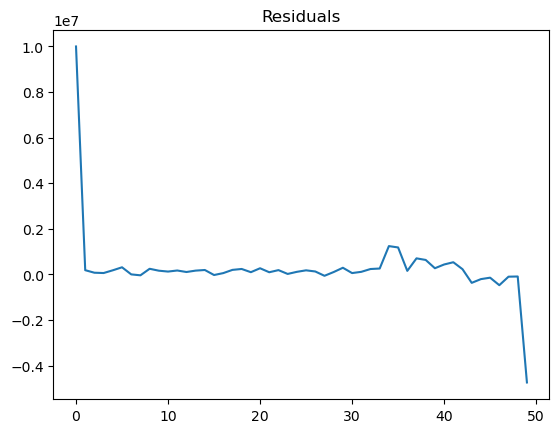

In [22]:
residuals = sarima_fea.resid
plt.plot(residuals)
plt.title("Residuals")
plt.show()


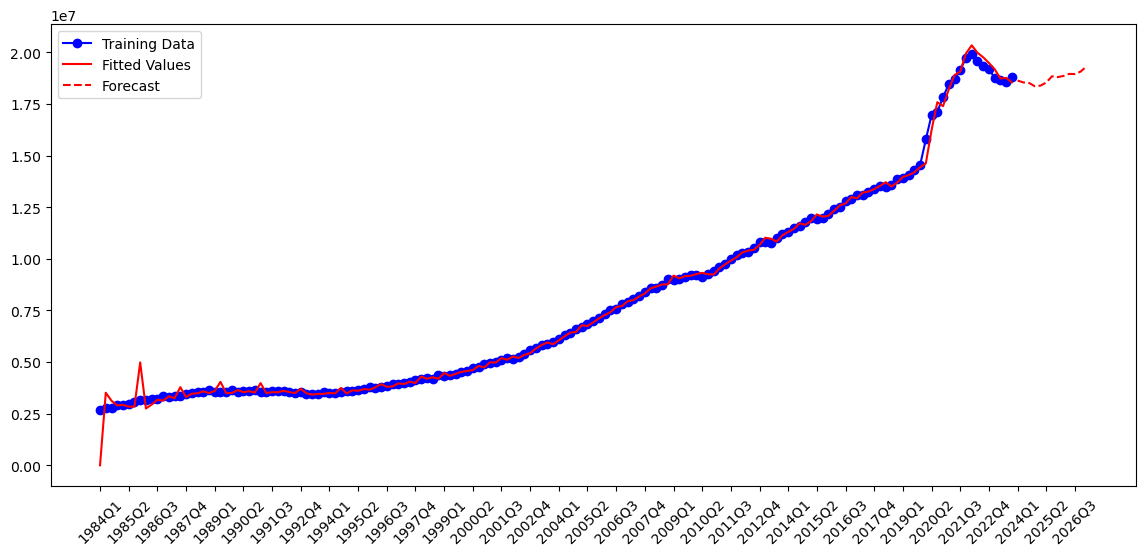

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train_2027,
         dep_train_2027,
         'b-o',
         label='Training Data')

# Plot fitted values for training data
plt.plot(date_train_2027,
         sarima.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot(df_X.Date,
         sarima.forecast(len(df_test_date)),
         '--r',
         label="Forecast")

# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([df['Date'][::5], df_test_date[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()







In [36]:
sarima.forecast(len(df_test_date))

array([18631584.7840584 , 18541537.05220007, 18516098.7846828 ,
       18356625.31990231, 18386572.32797757, 18537980.95665877,
       18838441.33927181, 18799192.22808642, 18855803.80985426,
       18953957.26673723, 18948802.67308429, 19067147.20544842,
       19316706.18002159])

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming df_X and df['Deposits'] are defined

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_fea_train[-50:], df_o['Deposits'][-50:], test_size=0.1, random_state=42)

# Apply normalization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the pipeline
lasso = Lasso(max_iter=10000)
rfe = RFE(estimator=lasso)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensure scaling is part of the pipeline
    ('feature_selection', rfe)
])

# Define the parameter grid
param_grid = {
    'feature_selection__estimator__alpha': [0.1, 1, 10, 100, 500, 1000, 5000,100000],
    'feature_selection__n_features_to_select': list(range(5, 17))  # Test n_features_to_select from 1 to 20
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_alpha = grid_search.best_params_['feature_selection__estimator__alpha']
best_n_features = grid_search.best_params_['feature_selection__n_features_to_select']
print(f"Best alpha: {best_alpha}")
print(f"Best n_features_to_select: {best_n_features}")

# Use the best parameters
lasso_best = Lasso(alpha=best_alpha, max_iter=5000)
selector_best = RFE(estimator=lasso_best, n_features_to_select=best_n_features)
selector_best.fit(X_train_scaled, y_train)

# Get the selected features
selected_mask = selector_best.get_support()
selected_features = np.where(selected_mask)[0]

print(f"Selected features based on optimized RFE and Lasso: {selected_features}")


/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.165e+11, tolerance: 3.916e+10
  model = cd_fast.enet_coordinate_descent(
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.165e+11, tolerance: 3.916e+10
  model = cd_fast.enet_coordinate_descent(
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

Best alpha: 5000
Best n_features_to_select: 5
Selected features based on optimized RFE and Lasso: [ 7  9 10 11 16]


In [14]:
# Example DataFrame
import pandas as pd
indices_to_pick = [ 7,  9, 10, 11, 16]
#[ 0,  1,  4,  6,  7,  8,  9, 11, 12, 13 ,14, 16]

print(f"Selected features based on RFE with Lasso: {selected_features}")

print("Feature Ranking:", selector_best.ranking_)

# Retrieve the importance of selected features
print("Feature Coefficients:", selector_best.estimator_.coef_)
# Display column names corresponding to the indices
selected_columns_ind = df_X.columns[indices_to_pick]
print("Selected Columns:", list(selected_columns_ind))


Selected features based on RFE with Lasso: [ 7  9 10 11 16]
Feature Ranking: [ 6 13  3 12  2  5 11  1  4  1  1  1 10  9  8  7  1]
Feature Coefficients: [-415481.37471344      -0.         -444306.72510385 3193205.91023224
  515523.75418663]
Selected Columns: ['CPI inflation rate', '5-year Treasury yield', '10-year Treasury yield', 'BBB corporate yield', 'Commercial Real Estate Price Index (Level)']


In [15]:
selected_indices = np.where(selected_mask)[0]
#[0,3,4,5,6,9,10,11,12]

In [16]:

# Identify common columns
common_columns = df_X.columns.intersection(df_fea_train.columns)

# Keep only common columns in both DataFrames, without aligning rows
df_X = df_X[common_columns]
df_fea_train = df_fea_train[common_columns]

In [17]:
train_features =scaler.fit_transform(df_fea_train.iloc[:, selected_indices])
test_features = scaler.transform(df_X.iloc[:, selected_indices])

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#(2,0,0)(0,1,1)[7]
#(1,0,1)(2,1,1)[2]
#(1,2,2)(0,0,0)[3] 
#(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 2, 48)
model = SARIMAX(
    endog =  pd.Series(dep_train_2027).ewm(span=9).mean().values,
exog = train_features,
    order = (1,1,1), # Example: (1, 1, 1)
    seasonal_order = (0,1,2,7),  # Example: (1, 1, 1, 12) for yearly seasonality
)

sarima_fea = model.fit(disp=False)
sarima_fea.summary()
#(0,2,0)(0,1,1)[40] 

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  160
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1991.026
Date:                                Fri, 06 Dec 2024   AIC                           4002.052
Time:                                        12:53:27   BIC                           4032.290
Sample:                                             0   HQIC                          4014.336
                                                - 160                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.208e+04    4.9e+04     -0.654      0.513   -1.28e+05     6.4e+04
x2          4.972e+04   4.13e+04      1.205      0.228   -3.12e+04    1.31e+05
x3         -1.836e+05   1.73e+04    -10.624      0.000   -2.17e+05    -1.5e+05
x4           1.23e+06   5.65e+04     21.767      0.000    1.12e+06    1.34e+06
x5           2.26e+04   4828.304      4.682      0.000    1.31e+04    3.21e+04
ar.L1          0.5554      0.068      8.170      0.000       0.422       0.689
ma.L1         -0.4818      0.069     -7.034      0.000      -0.616      -0.348
ma.S.L7       -0.0458      0.012     -3.849      0.000      -0.069      -0.022
ma.S.L14      -0.0250      0.007     -3.549      0.000      -0.039      -0.011
sigma2      3.796e+09      7.123   5.33e+08      0.000     3.8e+09     3.8e+09
===================================================================================
Ljung-Box (L1) (Q):                  78.60   Jarque-Bera (JB):                69.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.28   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+24. Standard errors may be unstable.
"""

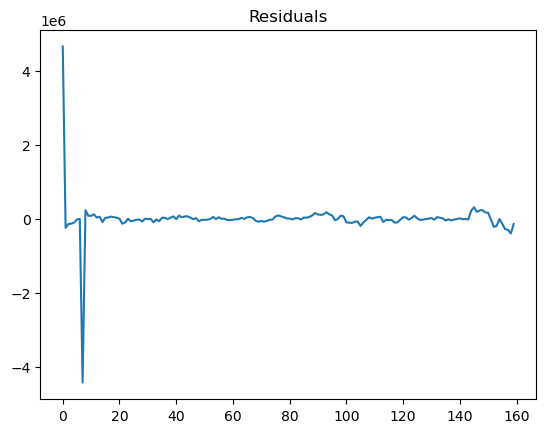

In [28]:
residuals = sarima_fea.resid
plt.plot(residuals)
plt.title("Residuals")
plt.show()

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#(2,0,0)(0,1,1)[7]
#(1,0,1)(2,1,1)[2]
#(1,2,2)(0,0,0)[3] 
#(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 2, 48)
model = SARIMAX(
    endog =  dep_train_2027[-50:].values,
exog = train_features[-50:],
    order = (1,1,1), # Example: (1, 1, 1)
    seasonal_order = (0,1,2,7),  # Example: (1, 1, 1, 12) for yearly seasonality
)

sarima_fea = model.fit(disp=False)
sarima_fea.summary()
#(0,2,0)(0,1,1)[40] 

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                   50
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood                -580.702
Date:                                Fri, 06 Dec 2024   AIC                           1181.404
Time:                                        12:52:57   BIC                           1198.780
Sample:                                             0   HQIC                          1187.773
                                                 - 50                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.056e+06   2.26e+05     -4.677      0.000    -1.5e+06   -6.13e+05
x2          5.838e+05   3.99e+05      1.463      0.143   -1.98e+05    1.37e+06
x3         -1.446e+06   3.54e+05     -4.089      0.000   -2.14e+06   -7.53e+05
x4          1.703e+06   4.44e+05      3.835      0.000    8.33e+05    2.57e+06
x5          7.448e+04   7.71e+04      0.966      0.334   -7.66e+04    2.26e+05
ar.L1          0.9380      0.095      9.830      0.000       0.751       1.125
ma.L1         -0.9936      0.312     -3.182      0.001      -1.606      -0.382
ma.S.L7       -0.0507      0.137     -0.369      0.712      -0.320       0.218
ma.S.L14      -0.0062      0.068     -0.092      0.927      -0.139       0.126
sigma2      6.902e+10      0.958   7.21e+10      0.000     6.9e+10     6.9e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 1.65
Prob(Q):                              0.65   Prob(JB):                         0.44
Heteroskedasticity (H):               4.93   Skew:                             0.48
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+27. Standard errors may be unstable.
"""

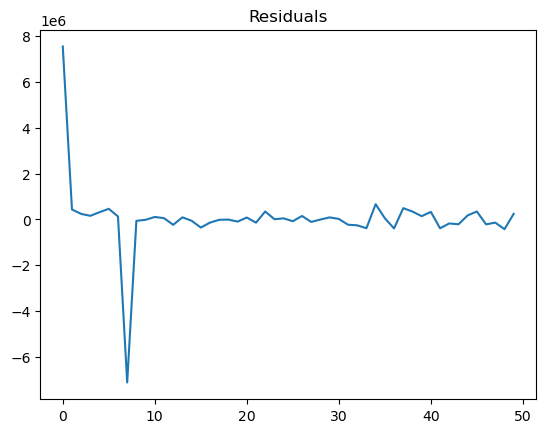

In [32]:
residuals = sarima_fea.resid
plt.plot(residuals)
plt.title("Residuals")
plt.show()

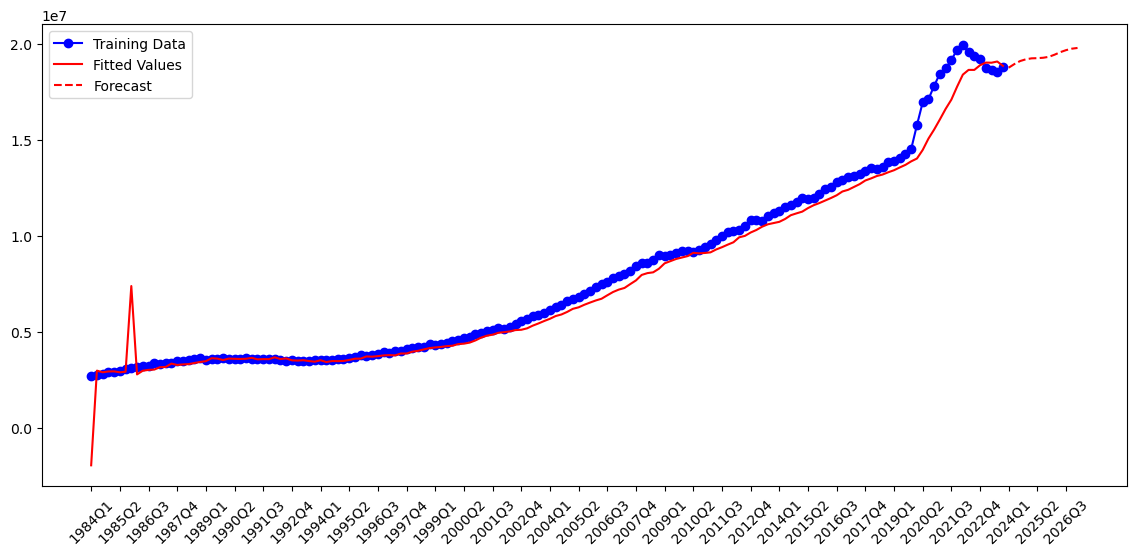

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

y_preds = sarima_fea.forecast(steps=len(df_test_date), exog=test_features)
y_preds_smoothed = pd.Series(y_preds).ewm(span=9).mean()

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train_2027,
         dep_train_2027,
         'b-o',
         label='Training Data')

# Plot fitted values for training data
plt.plot(date_train_2027,
          sarima_fea.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot( df_test_date,
          y_preds_smoothed,
         '--r',
         label="Forecast")

# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train_2027[::5], df_test_date[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()





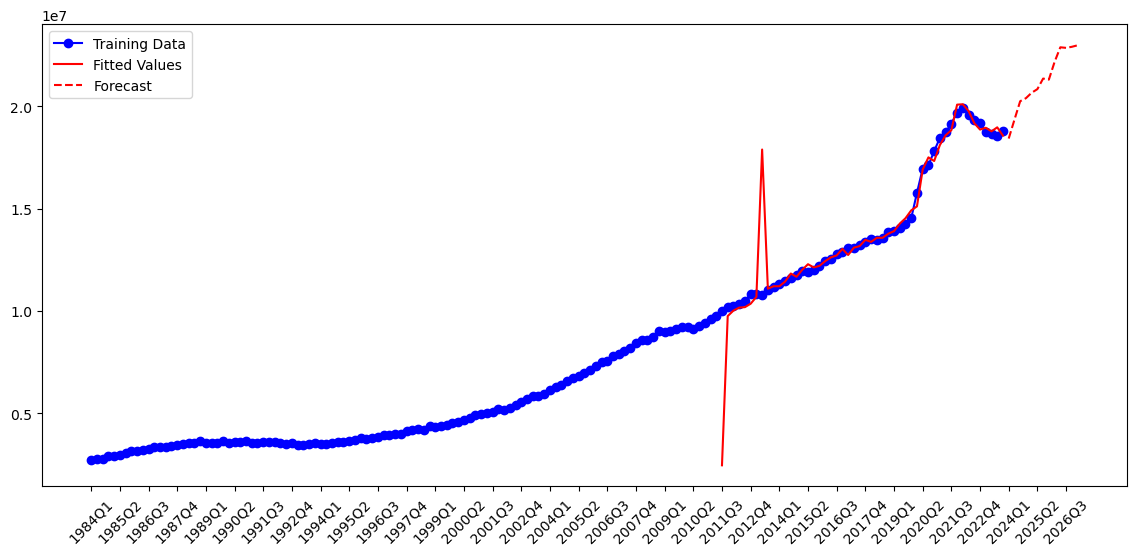

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

y_preds = sarima_fea.forecast(steps=len(df_test_date), exog=test_features)


plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train_2027,
         dep_train_2027.values,
         'b-o',
         label='Training Data')

# Plot fitted values for training data
plt.plot(date_train_2027[-50:],
          sarima_fea.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot( df_test_date,
          y_preds,
         '--r',
         label="Forecast")

# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train_2027[::5], df_test_date[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()



In [77]:
#unsmoothed,nearest 50 Quaters fits
y_preds

array([18432615.69098862, 19355093.10127974, 20258921.25890354,
       20406007.61607733, 20672219.55813497, 20849051.92362878,
       21365454.35087771, 21314255.1120007 , 22180901.68815476,
       22894809.97103141, 22867056.83137058, 22917950.87360502,
       22991479.20979383])

In [56]:
#Smoothed,emw=9
y_preds

array([19045237.80825048, 19460356.37959785, 19736642.9243554 ,
       19767957.52353116, 19788919.25751955, 19689397.11983679,
       19738464.2948096 , 19886270.23645069, 20263966.82981313,
       20497324.68333532, 20490898.63684516, 20491332.63907652,
       20375796.09714685])

In [ ]:
#Other Baseline cases....

In [5]:
#GridSearch&Appendix

In [9]:
# Load the .csv file into a DataFrame
df_X = pd.read_csv("/Users/sherrywang/deposit-prediction/cleaned_data/stress_basline.csv")


# Set display options for maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


dep_train_2027 = df_o['Deposits']
date_train_2027 = df['Date']
df_test_X= df_X.drop(columns=['Date'])
df_test_date = df_X['Date']

In [228]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
#use one trainning set to fit and get lowest average
# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_score = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 12
for m in range(1, 50):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []

    # Step 1: Fit the ARIMA model using the entire training dataset
    try:
        print(f"Fitting ARIMA model for m={m} on the entire training set...")
        model = auto_arima(
            pd.Series(dep_train_2027).ewm(span=9).mean().values,  # Entire training dataset
            seasonal=True,
            m=m,
            D = 1,
            d=1,
            max_p=10,
            max_q=10,
            trace=False,
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True
        )
        print(f"Fitted model for m={m}")
    except Exception as e:
        print(f"Failed to fit model for m={m}: {e}")
        continue

    # Step 2: Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train_2027.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test for the current fold
            train, test = dep_train_2027.values[train_idx], dep_train_2027.values[test_idx]
            
            # Predict on the test set using the pre-fitted model
            preds = model.predict(len(test), exogenous=None)
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
    # Step 3: Compute the average MASE score across folds
    if fold_scores:
        avg_score = np.mean(fold_scores)
        print(f"  Average MASE for m={m}: {avg_score:.4f}")
        results[m] = avg_score

        # Update the best m if the average score is lower
        if avg_score < best_score:
            best_score = avg_score
            best_m = m

# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best average MASE: {best_score:.4f}")

# Print all results for reference
print("All MASE scores per m:")
for m, score in results.items():
    print(f"  m={m}: {score:.4f}")


Evaluating seasonal period m=1
Fitting ARIMA model for m=1 on the entire training set...
Fitted model for m=1
  Fold 1
    MASE: 28.4061
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Fold 2
    MASE: 64.6552
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Fold 3
    MASE: 30.2804
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Fold 4
    MASE: 11.5997
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Fold 5
    MASE: 3.5187
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Average MASE for m=1: 27.6920
Evaluating seasonal period m=2
Fitting ARIMA model for m=2 on the entire training set...
Fitted model for m=2
  Fold 1
    MASE: 28.9804
 ARIMA(0,1,0)(1,1,1)[2]          
  Fold 2
    MASE: 66.0806
 ARIMA(0,1,0)(1,1,1)[2]          
  Fold 3
    MASE: 31.1206
 ARIMA(0,1,0)(1,1,1)[2]          
  Fold 4
    MASE: 12.0417
 ARIMA(0,1,0)(1,1,1)[2]          
  Fold 5
    MASE: 3.8609
 ARIMA(0,1,0)(1,1,1)[2]          
  Average MASE for m=2: 28.4168
Evaluating seasonal period m=3
Fitting ARIMA model for m=3 on the entire training set...
Fitted model for m=

In [59]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
#use one trainning set to fit and get lowest average
# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_score = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 12
for m in range(1, 50):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []

    # Step 1: Fit the ARIMA model using the entire training dataset
    try:
        print(f"Fitting ARIMA model for m={m} on the entire training set...")
        model = auto_arima(
            pd.Series(dep_train_2027).ewm(span=9).mean().values,  # Entire training dataset
            seasonal=True,
            m=m,
            D = 1,
            d=1,
            max_p=10,
            max_q=10,
            trace=False,
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True
        )
        print(f"Fitted model for m={m}")
    except Exception as e:
        print(f"Failed to fit model for m={m}: {e}")
        continue

    # Step 2: Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train_2027.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test for the current fold
            train, test = pd.Series(dep_train_2027).ewm(span=9).mean().values[train_idx], pd.Series(dep_train_2027).ewm(span=9).mean().values[test_idx]
            
            # Predict on the test set using the pre-fitted model
            preds = model.predict(len(test), exogenous=None)
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
    # Step 3: Compute the average MASE score across folds
    if fold_scores:
        avg_score = np.mean(fold_scores)
        print(f"  Average MASE for m={m}: {avg_score:.4f}")
        results[m] = avg_score

        # Update the best m if the average score is lower
        if avg_score < best_score:
            best_score = avg_score
            best_m = m

# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best average MASE: {best_score:.4f}")

# Print all results for reference
print("All MASE scores per m:")
for m, score in results.items():
    print(f"  m={m}: {score:.4f}")


Evaluating seasonal period m=1
Fitting ARIMA model for m=1 on the entire training set...
Fitted model for m=1
  Fold 1
    MASE: 31.9068
 ARIMA(0,1,4)(0,0,0)[0] intercept
  Fold 2
    MASE: 60.2550
 ARIMA(0,1,4)(0,0,0)[0] intercept
  Fold 3
    MASE: 35.0761
 ARIMA(0,1,4)(0,0,0)[0] intercept
  Fold 4
    MASE: 13.4333
 ARIMA(0,1,4)(0,0,0)[0] intercept
  Fold 5
    MASE: 4.5206
 ARIMA(0,1,4)(0,0,0)[0] intercept
  Average MASE for m=1: 29.0384
Evaluating seasonal period m=2
Fitting ARIMA model for m=2 on the entire training set...
Fitted model for m=2
  Fold 1
    MASE: 29.4190
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 2
    MASE: 55.2074
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 3
    MASE: 31.4454
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 4
    MASE: 11.5461
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 5
    MASE: 3.2108
 ARIMA(0,1,0)(0,1,0)[2]          
  Average MASE for m=2: 26.1657
Evaluating seasonal period m=3
Fitting ARIMA model for m=3 on the entire training set...
Fitted model for m=

KeyboardInterrupt: 

In [229]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
#best fold MASE
# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_scores = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 39
for m in range(1, 50):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []
    
    # Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train_2027.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test
            train, test = dep_train_2027.values[train_idx], dep_train_2027.values[test_idx]
            
            # Fit auto_arima for the current fold and m
            model = auto_arima(
                train,
                seasonal=True,
                D=1,
                d=1,
                m=m,
                max_p=10,
                max_q=10,
                trace=False,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )
            
            # Predict on the test set
            preds = model.predict(len(test))
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
    # Average MASE score across folds
    print(model)
    results[m] = [score,model,fold]
   


# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best MASE: {best_scores:.4f}")
sorted_results = sorted(results.items(), key=lambda x: x[1][0])
print(sorted_results[1])


Evaluating seasonal period m=1
  Fold 1
    MASE: 0.5004
 ARIMA(0,1,0)(0,0,0)[0] intercept
  Fold 2
    MASE: 2.4041
 ARIMA(0,1,0)(0,0,0)[0] intercept
  Fold 3
    MASE: 3.1543
 ARIMA(0,1,0)(0,0,0)[0] intercept
  Fold 4
    MASE: 1.4973
 ARIMA(0,1,0)(0,0,0)[0] intercept
  Fold 5
    MASE: 2.6180
 ARIMA(0,1,0)(0,0,0)[0] intercept
 ARIMA(0,1,0)(0,0,0)[0] intercept
Evaluating seasonal period m=2
  Fold 1
    MASE: 1.1107
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 2
    MASE: 0.5563
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 3
    MASE: 0.9658
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 4
    MASE: 0.7128
 ARIMA(1,1,0)(1,1,1)[2]          
  Fold 5
    MASE: 2.0349
 ARIMA(1,1,0)(1,1,1)[2]          
 ARIMA(1,1,0)(1,1,1)[2]          
Evaluating seasonal period m=3
  Fold 1
    MASE: 0.5709
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 2
    MASE: 0.5114
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 3
    MASE: 0.3575
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 4
    MASE: 1.3804
 ARIMA(0,1,0)(0,1,0)[3]          